In [1]:
from IPython import get_ipython
ipython = get_ipython()
if ipython is not None:
    ipython.run_line_magic('load_ext', 'autoreload')
    ipython.run_line_magic('autoreload', '2')
else:
    print("could not load extension")

In [2]:
import getpass

user = getpass.getuser()
from omni.isaac.kit import SimulationApp

# Set the path below to your desired nucleus server
# Make sure you installed a local nucleus server before this
# and that isaacsim is running
simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/test.usd"})

[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] =========================== DEPRECATION WARNING ===========================
[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] Traceback (most recent call last):
[Warning] [omni.isaac.kit] File '/home/ubuntu/Omniverse/library/isaac-sim-4.2.0/kit/python/lib/python3.10/runpy.py', line 196
[Warning] [omni.isaac.kit]   return _run_code(code, main_globals, None,
[Warning] [omni.isaac.kit] File '/home/ubuntu/Omniverse/library/isaac-sim-4.2.0/kit/python/lib/python3.10/runpy.py', line 86
[Warning] [omni.isaac.kit]   exec(code, run_globals)
[Warning] [omni.isaac.kit] File '/home/ubuntu/.local/lib/python3.10/site-packages/ipykernel_launcher.py', line 18
[Warning] [omni.isaac.kit]   app.launch_new_instance()
[Warning] [omni.isaac.kit] File '/home/ubuntu/.local/lib/python3.10/site-packages/traitlets/config/application.py', line 1075
[Warning] [omni.isaac.kit]   app.start()
[Warning] [omni.isaac.kit] File '/home/ubuntu/.local/lib/python3.10

2025-03-04 10:54:47 [15,780ms] [Error] [gpu.foundation.plugin] Failed to read texture file ./textures/color_121212.hdr or file is empty
2025-03-04 10:54:47 [15,780ms] [Error] [rtx.scenedb.plugin] Failed to upload DomeLight texture ./textures/color_121212.hdr


In [3]:
import carb
from omni.physx import get_physx_scene_query_interface  # for raycasting e.g raycast_closest()
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicCuboid, DynamicSphere, DynamicCone
from omni.timeline import get_timeline_interface
from omni.isaac.core.utils.stage import get_current_stage
import omni.isaac.core.utils.prims as prims_utils
from omni.usd import get_prim_at_path
import omni.isaac.core.utils.mesh as mesh_utils


import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from Lunar_Dust import Lunar_Dust
from Panel_Class import Panel



# Setup Simple Scene
Sun + Flat Plane (lunar surface) + Solar Panel

In [4]:
world = World(stage_units_in_meters=1.0)
stage = get_current_stage()
world.clear()
# world.scene.add_default_ground_plane()
# A render/ step or an update call is needed to reflect the changes to the opened USD in Isaac Sim GUI
#  Note: avoid pressing play/ pause or stop in the GUI in this workflow.
world.render()

# Create the Sun
sun = prims_utils.create_prim(
    "/World/Sun",
    "SphereLight",
    position=[1.0, 1.0, 100.0],
    attributes={
        "inputs:radius": 1,
        "inputs:intensity": 5e3,
        "inputs:color": (1.0, 1.0, 1.0)
    }
)
world.render()

In [5]:
def adjust_light(stage, position, intensity=3e9, radius=0.01):
    """
    Adjusts the properties of the first SphereLight found in the given stage.

    Parameters:
    stage (Usd.Stage): The stage containing the lights.
    position (tuple): A tuple representing the new position (x, y, z) of the light.
    intensity (float, optional): The new intensity of the light. Default is 3e9.
    radius (float, optional): The new radius of the light. Default is 0.01.

    Returns:
        None
    """
    lights = []
    for prim in stage.Traverse():
        if prim.GetTypeName() == "SphereLight":
            lights.append(prim)
    if lights:
        light = lights[0]
        light_path = light.GetPath()
        # Adjust position
        translate_attr = stage.GetPrimAtPath(light_path).GetAttribute(
            "xformOp:translate"
        )
        translate_attr.Set(position)
        # Adjust intensity
        intensity_attr = stage.GetPrimAtPath(light_path).GetAttribute(
            "inputs:intensity"
        )
        intensity_attr.Set(intensity)
        # Adjust radius
        radius_attr = stage.GetPrimAtPath(light_path).GetAttribute("inputs:radius")
        radius_attr.Set(0.01)

In [6]:
# Load a USD prepared with the meshes of ground + solar panel + two supports

# IMPORTANT: First time: copy paste the usd from the github repository to the nucleus server
# from: <path to the repository>/jaops-sim/scenes/assets/simplified_surface_solar_panel.usd
# to: omniverse://localhost/Users/<your username>/simplified_surface_solar_panel.usd
# (you can copy paste within the IsaacSim Content Window)
#     prims_utils.set_prim_attribute_value(panel_path, "primvars:displayColor", power_colors)


usd_path = f"omniverse://localhost/Users/ubuntu/moon_environnement.usdc"#
prim_path = "/World/Lunar_Base"

# create the prim
prim = prims_utils.create_prim(prim_path=prim_path, usd_path=usd_path)
world.render()

timeline = get_timeline_interface()
timeline.play()
for _ in range(2):
    simulation_app.update()
timeline.pause()

[17.816s] Simulation App Startup Complete
2025-03-04 10:54:50 [18,781ms] [Warning] [omni.usd] Coding Error: in _Get at line 3003 of /builds/omniverse/usd-ci/USD/pxr/usdImaging/usdImaging/delegate.cpp -- Failed verification: ' prim '

2025-03-04 10:54:50 [18,781ms] [Warning] [omni.usd] Coding Error: in _Get at line 3003 of /builds/omniverse/usd-ci/USD/pxr/usdImaging/usdImaging/delegate.cpp -- Failed verification: ' prim '

2025-03-04 10:54:50 [18,781ms] [Warning] [omni.usd] Coding Error: in _Get at line 3003 of /builds/omniverse/usd-ci/USD/pxr/usdImaging/usdImaging/delegate.cpp -- Failed verification: ' prim '

2025-03-04 10:54:50 [18,781ms] [Warning] [omni.usd] Coding Error: in _Get at line 3003 of /builds/omniverse/usd-ci/USD/pxr/usdImaging/usdImaging/delegate.cpp -- Failed verification: ' prim '

2025-03-04 10:54:50 [18,781ms] [Warning] [omni.usd] Coding Error: in _Get at line 3003 of /builds/omniverse/usd-ci/USD/pxr/usdImaging/usdImaging/delegate.cpp -- Failed verification: ' prim '

2025-03-04 10:54:51 [19,298ms] [Error] [rtx.scenedb.plugin] Failed to upload DomeLight texture ./textures/color_121212.hdr


# Solar panel creation



In [7]:
# usd_path = f"omniverse://localhost/Users/ubuntu/solar_panel.usd"
usd_path = f"omniverse://localhost/Users/ubuntu/solar_panel_final.usdc"
panel_prim_path = prim_path + "/Panel"
prims_utils.delete_prim(panel_prim_path)

panel_structure = prims_utils.create_prim(prim_path=panel_prim_path, usd_path=usd_path, scale=[20,20,20], position = [20, -80, 15])
world.render()

panel = prims_utils.get_prim_at_path(panel_prim_path)

#set_prim_orientation_euler(panel_prim_path, [30,0,0], degrees=True)

2025-03-04 10:54:51 [19,361ms] [Warning] [omni.usd] Coding Error: in AddXformOp at line 224 of /builds/omniverse/usd-ci/USD/pxr/usd/usdGeom/xformable.cpp -- Unable to add xform op of type TypeTranslate and precision PrecisionFloat on prim at path </World/Lunar_Base/Moon_terrain/WC_Terrain_0_0/WC_Terrain_mesh>. opSuffix=, isInverseOp=0

2025-03-04 10:54:51 [19,361ms] [Warning] [omni.usd] Coding Error: in AddXformOp at line 224 of /builds/omniverse/usd-ci/USD/pxr/usd/usdGeom/xformable.cpp -- Unable to add xform op of type TypeOrient and precision PrecisionFloat on prim at path </World/Lunar_Base/Moon_terrain/WC_Terrain_0_0/WC_Terrain_mesh>. opSuffix=, isInverseOp=0

2025-03-04 10:54:51 [19,361ms] [Warning] [omni.usd] Coding Error: in AddXformOp at line 224 of /builds/omniverse/usd-ci/USD/pxr/usd/usdGeom/xformable.cpp -- Unable to add xform op of type TypeScale and precision PrecisionFloat on prim at path </World/Lunar_Base/Moon_terrain/WC_Terrain_0_0/WC_Terrain_mesh>. opSuffix=, isInvers

2025-03-04 10:54:51 [19,450ms] [Error] [omni.usd.commands.usd_commands] /World/Lunar_Base/Panel does not exist


In [8]:
import typing
from pxr import Usd, UsdGeom, Gf
def get_world_transform_xform(prim: Usd.Prim) -> typing.Tuple[Gf.Vec3d, Gf.Rotation, Gf.Vec3d]:
    """
    Get the local transformation of a prim using Xformable.
    See https://openusd.org/release/api/class_usd_geom_xformable.html
    Args:
        prim: The prim to calculate the world transformation.
    Returns:
        A tuple of:
        - Translation vector.
        - Rotation quaternion, i.e. 3d vector plus angle.
        - Scale vector.
    """
    xform = UsdGeom.Xformable(prim)
    time = Usd.TimeCode.Default() # The time at which we compute the bounding box
    world_transform: Gf.Matrix4d = xform.ComputeLocalToWorldTransform(time)
    translation: Gf.Vec3d = world_transform.ExtractTranslation()
    rotation: Gf.Rotation = world_transform.ExtractRotation()
    scale: Gf.Vec3d = Gf.Vec3d(*(v.GetLength() for v in world_transform.ExtractRotationMatrix()))
    return translation, rotation

In [9]:
# perform raycast

world.step(render=True)
timeline.play()

panel_position, panel_orientation = get_world_transform_xform(panel)

print(panel_position, panel_orientation)


sun_coord, sun_orientation = get_world_transform_xform(sun) #(0,0,0)
print(sun_coord)

direction = (-sun_coord[0] + panel_position[0], -sun_coord[1] +panel_position[1],- sun_coord[2] + panel_position[2])
#direction = (sun_coord[0] - panel_position[0], sun_coord[1] - panel_position[1], sun_coord[2] - panel_position[2])

origin = carb.Float3(panel_position[0], panel_position[1], panel_position[2])
#direction = (0., 0.,-2.)

max_distance = np.linalg.norm(direction)
direction_normalized = tuple(d / max_distance for d in direction)


rayDir = carb.Float3(direction_normalized[0],direction_normalized[1],direction_normalized[2])

hit_info = get_physx_scene_query_interface().raycast_closest(origin, rayDir, 1000000000000)
#hit_info = get_physx_scene_query_interface().raycast_closest(sun_coord, direction_normalized, max_distance+100)

print(hit_info)

(20, -80, 15) [(1, 0, 0) 0]
(1, 1, 100)
{'hit': True, 'position': carb.Float3(20,-80,15), 'normal': carb.Float3(-0.159743,0.681009,0.714639), 'distance': 0.0, 'faceIndex': 0, 'collision': '/World/Lunar_Base/Moon_terrain/WC_Terrain_0_0/WC_Terrain_mesh', 'rigidBody': '/World/Lunar_Base/Moon_terrain/WC_Terrain_0_0/WC_Terrain_mesh', 'material': '', 'protoIndex': 4294967295}


# Compute Lunar Dust Accumulation

In [10]:
class Panel() :
    """
    Class responsible for keeping track of the battery status
    prim_path (string) : Path to the panel prim
    sun_path (string) : Path to the Sun
    max_storage (int) : Battery capacity (Wh)
    current_storage (int) : Actual charge of the battery (Wh) 
    power_consumption (int) : Power consumed by the rover (W)
    power_produced (int) : Power produced by the rover (W)
    dust_coverage (float) : Percentage of the panel surface covered by dust (between 0 and 1)
    """
    def __init__(self, panel_prim_path, sun_path = "/World/Sun", nb_cells = 100, max_storage = 1000, 
                 current_storage = 0, power_consumption = 10, power_produced = 0, dust_coverage = 0) :
        self.prim_path = panel_prim_path
        self.sun_path = sun_path
        self.length, self.width, self.height = prims_utils.get_prim_attribute_value(panel_prim_path, "xformOp:scale")
        self.panel_surface = self.length * self.width
        self.nb_cells = nb_cells
        self.cell_area = self.panel_surface / self.nb_cells
        self.max_storage = max_storage
        self.current_storage = current_storage
        self.power_consumption = power_consumption
        self.current_charge = round(100*current_storage/max_storage, 2)
        self.power_produced = power_produced

        self.lunar_dust = LunarDust() ### WORK IN PROGRESS
        self.dust_coverage = 0
        self.prev_simulation_time = 0
        
    def update(self, stage, simulation_time) :   #SIMULATION TIME: CHANGED FROM ELAPSED TIME
        """
        Execute one simulation step for the solar panel (currently doesn't support moving the panel to follow the sun)

        Args :
            time_elapsed : time elapsed since last update
            stage : The world stage

        Returns :
            None
        """
        
        time_elapsed = (simulation_time - self.prev_simulation_time)
        self.prev_simulation_time = simulation_time
        
        mesh_prim = stage.GetPrimAtPath(self.prim_path)

        self.lunar_dust.update(simulation_time, mesh_prim) ### WORK IN PROGRESS
        self.dust_coverage = self.lunar_dust.coverage ### WORK IN PROGRESS
        self.update_power_produced(stage)
        self.update_state(time_elapsed)
        
    
    def update_state(self, time_elapsed) :
        """
        Simulate battery evolution during time_elapsed

        Args :
            time_elapsed : time elapsed since last state update

        Returns :
            None
        """
        self.current_storage += (self.power_produced - self.power_consumption)* (time_elapsed / 3600)
        if self.current_storage > self.max_storage :
            self.current_storage = self.max_storage
        if self.current_storage < 0 :
            self.current_storage = 0
        self.current_charge = round(100*self.current_storage/self.max_storage, 2)
        if self.current_storage == 0 :
            print("Battery is empty")
            

    def update_power_produced(self, stage) :
        """
        Update the power produced by the solar pannel based on the stage state

        Args : 
            stage : The world stage

        Returns :
            None
        """
        face_vertex_indices = prims_utils.get_prim_attribute_value(self.prim_path, "faceVertexIndices")
        
        # Get mesh vertices
        mesh_prim = stage.GetPrimAtPath(self.prim_path)
        world_prim = stage.GetPrimAtPath("/World")
        points_world = mesh_utils.get_mesh_vertices_relative_to(mesh_prim, world_prim)

        # Get quad centers
        num_quads = len(face_vertex_indices) // 4
        quad_centers = np.array([np.mean(points_world[list(face_vertex_indices[i * 4 : (i + 1) * 4])], axis=0) for i in range(num_quads)])
        # In this case we know that the first 100 elements are the faces on the top of the pannel, be careful with other usd.
        quad_centers = quad_centers[:self.nb_cells] # Keep only faces on the top -> avoid unnecessary computations
        dot_products = self.compute_sun_to_mesh(quad_centers)
        
        power_generation = self.compute_power(dot_products)
        self.power_produced = power_generation

    def set_power_produced(self, power_produced) :
        """
        Manually change the power produced

        Args :
            power_consumed (float) : The power produced by the panel

        Returns :
            None
        """
        self.power_produced = power_produced

    def set_power_consumed(self, power_consumed) :
        """
        Manually change the power consumed

        Args :
            power_consumed (float) : The power consumed by the electrics

        Returns :
            None
        """
        self.power_consumed = power_consumed

    def set_panel_orientation_euler(self, angles, degrees = True) :
        """
        Set the panel orientation using Euler angles.

        Args:
            angles (tuple or list): The Euler angles (in radians or degrees) to set the orientation.
            degrees (bool, optional): If True, the angles are interpreted as degrees.
                                      If False, the angles are interpreted as radians.
    
        Returns:
            None
        """
        prims_utils.set_prim_attribute_value(
            self.prim_path, "xformOp:orient",
            rotations_utils.euler_angles_to_quat(angles, degrees=degrees),
        )
        
    def display_state(self) :
        """
        Display the current state of the battery
        """
        print(f"Battery is at {self.current_charge}%, actual production (W) : {self.power_produced}, actual consumption (W): {self.power_consumption} | current_storage (Wh) : {self.current_storage} ")

    def compute_sun_to_mesh(self, mesh_face_centers, output="dotproducts"):
        """
        Uses ray-tracing to compute the dot products between the normals of mesh face centers and the direction from the Sun to each face center.
    
        Parameters:
        mesh_face_centers (array-like): An array of 3D coordinates representing the centers of the mesh faces.
        path_sun (str): The path to the Sun object in the scene. Default is "/World/Sun".
        output (str): The type of output to return. Options are "dotproducts", "dotproducts_normals", or "angles_deg".
                      Default is "dotproducts".
    
        Returns:
        numpy.ndarray or tuple: Depending on the output parameter:
            - "dotproducts": Returns an array of dot products.
            - "dotproducts_normals": Returns a tuple containing an array of dot products and an array of normals.
            - "angles_deg": Returns an array of angles in degrees.
    
        Notes:
        - If a mesh face center is in the shadow of an obstruction, the corresponding dot product and normal are set to NaN.
        - If no hit is detected for a mesh face center, the corresponding dot product and normal are set to NaN.
        - The function prints a message if no hit is detected for a mesh face center.
        """
        sun_coord = prims_utils.get_prim_attribute_value(self.sun_path, "xformOp:translate")
    
        dot_products = np.zeros(len(mesh_face_centers))
        normals = np.zeros((len(mesh_face_centers), 3))
        hit_distances = []  # for debug
    
        for i, center in enumerate(mesh_face_centers):
            vector_to_cell = center - sun_coord
            distance = np.linalg.norm(vector_to_cell)
            direction = vector_to_cell / distance
    
            # Cast a ray from the Sun to the cell center
            hit_info = get_physx_scene_query_interface().raycast_closest(
                sun_coord, direction, distance + 1
            )  # increase max distance to avoid ray not reaching the surface
    
            if hit_info["hit"]:
                hit_distance = np.linalg.norm(hit_info["position"] - center)
                hit_distances.append(hit_distance)
                if (
                    hit_distance < 0.001
                ):  # consider that there is no obstruction between the sun and the cell center
                    normals[i] = np.array(hit_info["normal"])
                    dot_products[i] = np.dot(
                        normals[i], -1 * direction
                    )  # direction is sun to center, so need to flip it
                else:  # cell is in shadow of obstruction
                    dot_products[i] = np.nan
                    normals[i] = np.nan
            else:
                print(f"no hit, angle for cell center at {center} is undefined")
                dot_products[i] = np.nan  # No hit, angle is undefined
                normals[i] = np.nan
    
        if output == "dotproducts":
            return dot_products
        if output == "dotproducts_normals":
            return dot_products, normals
        elif output == "angles_deg":
            sun_angles = np.arccos(dot_products) * (180 / np.pi)  # Convert to degrees
            return sun_angles
        else:
            print(
                "possible outputs are only 'dotproducts' , 'dotproducts_normals' or 'angles_deg'"
            )
            return
            
    def compute_power(self, cos_theta) :
        """
        Compute the power produced by the solar panel

        Args : 
            cos_theta : array of the cosine of the incidence angle for each solar cell

        Returns :
            Power produced by the solar panel
        """
        # P = A x I x n x cos(theta) x covering
        solar_intensity = 1376 # (W/m2)
        solar_cell_efficiency = 0.3 
        cos_theta[cos_theta < 0] = 0
        power_produced = self.cell_area * solar_intensity * solar_cell_efficiency * cos_theta * (1 - self.dust_coverage)
        return np.nansum(power_produced[:self.nb_cells])
            

In [11]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import typing
from pxr import Usd, UsdGeom, Gf

class LunarDust:
    def __init__(self):
        """
        Initializes the lunar dust accumulation simulation.
        
        :param surface_area: Surface area exposed to dust (m^2)
        :param time_step: Time step for accumulation updates (s)
        """
        # Lunar Dust behaviour options
        self.limit_deposition = False #True
        
        
        # Fixed parameters for dust behavior
        self.dust_density = 1500  # (kg/m^3) - 
        self.dust_diameter = 40e-6  # (m) - Approximate lunar dust particle diameter
        self.altitude_to_deposition_rate = 500
        
        # Altitude-to-accumulation rate interpolation data points
        alt_points = np.array([0, 0.6, 1, 1.9, 100])  # Altitudes (m)
        taux_points = np.array([10000, 500, 100, 20, 0.001])*1e-5  # Corresponding accumulation rates
        # at altitude 0 the accumulation rate has been set as 10000. there's no data on altitudes lower than 0.6 m, 
        # this is only to start the interpolation at zero
        
        # Create an interpolation function for accumulation rate based on altitude
        self.pchip_interp = PchipInterpolator(alt_points, taux_points)
        
       # Create an interpolation function for accumulation limit (by dust diameter) in a year based on data 
        if self.limit_deposition:
            print("DUST COVERAGE LIMITED BY DUST SIZE")
            dust_radius_points = np.array([10, 50, 100]) 
            limit_points = np.array([15, 3, 1.5])
            self.pchip_limit = PchipInterpolator(dust_radius_points, limit_points)
            self.max_coverage = self.pchip_limit(self.dust_diameter*1e6/2) / 100
            print("Max surface coverage for ", self.dust_diameter, " m dust: ", self.max_coverage)

        else:
            self.max_coverage = 1

        # Speed-to-accumulation rate interpolation data points 
        speed_points = np.array([0.5, 1, 3, 5, 7])
        altitude_reached_points = np.array([0.015, 0.024, 0.32, 1.32, 3.2])
        
        # Create an interpolation function for accumulation rate based on speed
        self.pchip_altitude_reached = PchipInterpolator(speed_points, altitude_reached_points)
        
        # Variables for dust accumulation tracking
        self.coverage = 0.0  # (%) Covered surface
        self.taux = 0.0  # Current accumulation rate
        self.total_time_passed = 0 
        self.prev_simulation_time = 0
        
        # Print Plots (choose one)
        plt.figure()
        plt.plot(np.linspace(0,1.9, 100), self.pchip_interp(np.linspace(0,1.9, 100)) * 1e5)
        plt.grid(True)
        plt.xlabel("Altitude")
        plt.ylabel("Deposition rate")
        plt.title("Deposition rate by altitude")
        #plt.show()

        plt.figure()
        plt.plot(np.linspace(0, 7, 100), self.pchip_altitude_reached(np.linspace(0, 7, 100)))
        plt.grid(True)
        plt.xlabel("Speed (m/s)")
        plt.ylabel("Altitude reached")
        plt.title("Deposition rate by altitude")
        #plt.show()
        
        if self.limit_deposition:
            plt.figure()
            plt.plot(np.linspace(10,100, 100), self.pchip_limit(np.linspace(10,100, 100)))
            plt.grid(True)
            plt.xlabel("Dust diameter")
            plt.ylabel("Max possible covered surface (%)")
            plt.title("Max covered surface by dust diameter")
            #plt.show()

        # Data for color changing
        self.retrieved_color = False
        self.final_color = Gf.Vec3f((0.85, 0.83, 0.8))
        self.final_roughness = 1.0


    
    def update(self, simulation_time: float, prim: Usd.Prim):
        """
        Updates the dust accumulation and surface coverage based on the current altitude.
        
        :param time_elapsed: Time elapsed since the last update (s)
        :param prim: The USD Prim representing the object in the simulation
        """
        
        time_elapsed = (simulation_time - self.prev_simulation_time)
        self.total_time_passed += time_elapsed #/ (86400*365)
        self.prev_simulation_time = simulation_time

        if self.total_time_passed < 3*60*60:
            print("Time Passed: ", round(self.total_time_passed / 60, 2), " minutes")
        elif self.total_time_passed < 86400*3:
            print("Time Passed: ", round(self.total_time_passed / (60*60), 2), " hours")
        elif self.total_time_passed < 86400*365/2:
            print("Time Passed: ", round(self.total_time_passed / 86400, 2), " days")
        else: 
            print("Time Passed: ", round(self.total_time_passed / (86400*365), 2), " years")
            
        altitude = self.get_surface_altitude(prim)
        print("Altitude: ", round(altitude,2), " m")
        
        self.taux = self.compute_dust_accumulation_rate(altitude) # + compute_dust_accumulation_rate_by_movement(speed) ## WORK IN PROGRESS
        print("Taux de deposition: ", round(self.taux*1e5, 2), " micrograms/cm^2*y")

        self.update_coverage(time_elapsed)
        print("Covered surface by dust: ", self.coverage*100, "%")
        print("")

            
    def get_surface_altitude(self, prim: Usd.Prim) -> float:
        """
        Retrieves the altitude of a given prim by extracting its world position.

        :param prim: The USD Prim to retrieve the position for.
        :return: Altitude (z-coordinate in meters)
        """
        xform = UsdGeom.Xformable(prim)
        time = Usd.TimeCode.Default() # The time at which we compute the bounding box
        world_transform: Gf.Matrix4d = xform.ComputeLocalToWorldTransform(time)
        translation: Gf.Vec3d = world_transform.ExtractTranslation()
        #rotation: Gf.Rotation = world_transform.ExtractRotation()
        #scale: Gf.Vec3d = Gf.Vec3d(*(v.GetLength() for v in world_transform.ExtractRotationMatrix()))  

        # Perform raycast to get the real altitude
        # raycast starts from way underground under the surface and goes in the Z+ direction in order to hit the ground under the surface
        world.step(render=True)
        

        direction = (0,0,1)
        origin = carb.Float3(translation[0], translation[1], -100) 
        max_distance = 1000000000 
        
        
        hit_info = get_physx_scene_query_interface().raycast_closest(origin, direction, max_distance+1)
        world.step(render=True)
        if hit_info["hit"]:
            ground_coordinates = hit_info["position"]
        else:
            print("object has no ground under it")
            ground_coordinates = (carb.Float3(translation[0], translation[1], -100000))

        altitude = translation[2]-ground_coordinates[2] 
        return altitude

    def compute_dust_accumulation_rate(self, altitude: float) -> float:
        """
        Computes the dust accumulation rate based on the current altitude using interpolation.

        :param altitude: Current altitude (m)
        :return: Accumulation rate (kg/m^2*y)
        """
        return self.pchip_interp(altitude)
    
    def compute_dust_accumulation_rate_by_movement(self, speed: float) -> float: ### WORK IN PROGRESS
        """
        Computes the dust accumulation rate based on the current speed using interpolation.

        :param altitude: Current speed (m/s)
        :return: Accumulation rate (kg/m^2*y)
        """
        return self.pchip_altitude_reached(speed) * self.altitude_to_deposition_rate
        
    def update_coverage(self, time_elapsed: float):
        """
        Updates the surface coverage percentage based on dust accumulation.
        
        :param time_elapsed: Time elapsed since the last update (s)
        """
        # Ensure taux and other parameters are defined
        if self.taux <= 0:
            return

        # Compute the fraction of the surface covered over time
        coverage_increase = (3/2) * (self.taux / ( self.dust_diameter * self.dust_density)) * \
                            (time_elapsed / (365 * 24 * 3600))  # Convert to years
        
        # Update total coverage
        self.coverage = min(self.max_coverage, self.coverage + coverage_increase)  # Ensure it doesn't exceed 100%


    def reset_accumulation(self):
        """
        Resets the dust accumulation and coverage to zero.
        """
        self.accumulated_dust = 0.0
        self.coverage = 0.0

    def update_color(self, shader_path):
        if self.retrieved_color is False:
            self.original_color = prims_utils.get_prim_attribute_value(shader_path, 'inputs:diffuseColor')
            self.original_roughness = prims_utils.get_prim_attribute_value(shader_path, 'inputs:roughness')
            #print("Original color: ", self.original_color)
            #print("Original roughness: ", self.original_roughness)
            self.retrieved_color = True
            
        new_color = self.original_color + self.coverage * (self.final_color - self.original_color)
        #print("New color: ", new_color)
        new_color = Gf.Vec3f(float(new_color[0]), float(new_color[1]), float(new_color[2]))

        new_roughness = self.original_roughness + self.coverage * (self.final_roughness - self.original_roughness)
        #print("New roughness: ", new_roughness)
        
        prims_utils.set_prim_attribute_value(shader_path, 'inputs:diffuseColor', new_color)
        prims_utils.set_prim_attribute_value(shader_path, 'inputs:roughness', new_roughness)

        world.render()

    def reset_color(self):
        prims_utils.set_prim_attribute_value(shader_path, 'inputs:diffuseColor', self.original_color)
        prims_utils.set_prim_attribute_value(shader_path, 'inputs:roughness', self.original_roughness)
     

Time Passed:  0.0  minutes
verse://localhost/Users/ubuntu/test.usd@ <0x1387a810>)

2025-03-04 11:11:52 [1,040,778ms] [Warning] [omni.usd] Warning: in _ReportErrors at line 2890 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/stage.cpp -- In </World/Lunar_Base/Rover/d455/RSD455/Visual/USB_C.material:binding>: The relationship target </D455/INTEL_REALSENSE_D455_CAD_EXTERN_ASM/MD0645501_ASM_12_ASM/AS0605401_ASM_4_ASM/_0137062C_1_ASM_2_ASM/_0137062C_1_1_1/Looks/Tropical_Blue> from </Root/RSD455/Visual/USB_C.material:binding> in layer @omniverse://localhost/NVIDIA/Assets/Isaac/4.0/Isaac/Sensors/Intel/RealSense/rsd455.usd@ refers to a path outside the scope of the reference from </husky_robot/d455>.  Ignoring. (getting targets for relationship </World/Lunar_Base/Rover/d455/RSD455/Visual/USB_C.material:binding> on stage @omniverse://localhost/Users/ubuntu/test.usd@ <0x1387a810>)

2025-03-04 11:11:52 [1,040,778ms] [Warning] [omni.usd] Warning: in _ReportErrors at line 2890 of /builds/omniverse/usd

2025-03-04 11:13:53 [1,161,961ms] [Error] [omni.physicsschema.plugin] UsdPhysics: Nested articulation roots are not allowed.
2025-03-04 11:13:53 [1,161,970ms] [Error] [omni.physicsschema.plugin] Joint (/World/Lunar_Base/Rover/solo_solar_pannel/piastra_orizz_centro/FixedJoint_centro) body relationship /World/Lunar_Base/Rover/solo_solar_pannel/GroundPlane points to a non existent prim, joint will not be created.
2025-03-04 11:13:53 [1,161,971ms] [Error] [omni.physicsschema.plugin] Joint (/World/Lunar_Base/Rover/solo_solar_pannel/piastra_orizz_dx/FixedJoint_dx) body relationship /World/Lunar_Base/Rover/solo_solar_pannel/GroundPlane points to a non existent prim, joint will not be created.
2025-03-04 11:13:53 [1,161,971ms] [Error] [omni.physicsschema.plugin] Joint (/World/Lunar_Base/Rover/solo_solar_pannel/piastra_orizz_sx/FixedJoint_sx) body relationship /World/Lunar_Base/Rover/solo_solar_pannel/GroundPlane points to a non existent prim, joint will not be created.
2025-03-04 11:13:53 [1,1

2025-03-04 11:13:53 [1,162,181ms] [Warning] [omni.graph.core.plugin] /World/Lunar_Base/Rover/Graphs/differential_controller/ArticulationController: [/World/Lunar_Base/Rover/Graphs/differential_controller] OmniGraph Warning: 'front_left_wheel'
                   (from compute() at line 124 in /home/ubuntu/Omniverse/library/isaac-sim-4.2.0/exts/omni.isaac.core_nodes/omni/isaac/core_nodes/ogn/python/nodes/OgnIsaacArticulationController.py)
Altitude:  14.39  m
Taux de deposition:  13.37  micrograms/cm^2*y
Covered surface by dust:  0.0 %

Time Passed:  0.0  minutes


2025-03-04 11:13:53 [1,162,230ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:53 [1,162,230ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:53 [1,162,230ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:54 [1,162,327ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:54 [1,162,327ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:54 [1,162,327ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:54 [1,162,399ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:54 [1,162,400ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  0.0 %

Time Passed:  3.17  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  1.0507673929776302 %



2025-03-04 11:13:55 [1,163,506ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,506ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,506ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,597ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,597ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,597ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,682ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:55 [1,163,682ms] [Error] [om

Time Passed:  6.34  years


2025-03-04 11:13:56 [1,164,647ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,647ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,647ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,666ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,666ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,666ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,764ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:56 [1,164,764ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  2.1015347859552604 %

Time Passed:  9.51  years


2025-03-04 11:13:57 [1,165,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,933ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:57 [1,165,933ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  3.1523021789328904 %

Time Passed:  12.68  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  4.203069571910521 %



2025-03-04 11:13:58 [1,166,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:58 [1,166,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:58 [1,166,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:58 [1,166,865ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:58 [1,166,866ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:58 [1,166,866ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:58 [1,167,004ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:58 [1,167,004ms] [Error] [om

Time Passed:  15.85  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  5.253836964888152 %



2025-03-04 11:13:59 [1,167,902ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:59 [1,167,902ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:59 [1,167,902ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:59 [1,167,919ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:59 [1,167,919ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:13:59 [1,167,919ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:13:59 [1,168,008ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:13:59 [1,168,009ms] [Error] [om

Time Passed:  19.03  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  6.304604357865783 %



2025-03-04 11:14:00 [1,168,893ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:00 [1,168,893ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:00 [1,168,893ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:00 [1,168,990ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:00 [1,168,990ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:00 [1,168,990ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:00 [1,169,073ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:00 [1,169,073ms] [Error] [om

Time Passed:  22.2  years


2025-03-04 11:14:01 [1,169,959ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:01 [1,169,959ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:01 [1,169,959ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:01 [1,170,069ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:01 [1,170,069ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:01 [1,170,069ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  7.355371750843413 %



2025-03-04 11:14:01 [1,170,183ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:01 [1,170,183ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:01 [1,170,183ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  25.37  years


2025-03-04 11:14:02 [1,171,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:02 [1,171,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:02 [1,171,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:02 [1,171,185ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:02 [1,171,185ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:02 [1,171,185ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  8.406139143821044 %



2025-03-04 11:14:03 [1,171,294ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:03 [1,171,294ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:03 [1,171,294ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  28.54  years


2025-03-04 11:14:03 [1,172,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:03 [1,172,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:03 [1,172,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:04 [1,172,371ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:04 [1,172,371ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:04 [1,172,371ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  9.456906536798675 %



2025-03-04 11:14:04 [1,172,383ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:04 [1,172,384ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:04 [1,172,384ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  31.71  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  10.507673929776304 %



2025-03-04 11:14:05 [1,173,272ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,272ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,272ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,365ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,365ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,365ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,512ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:05 [1,173,512ms] [Error] [om

Time Passed:  34.88  years


2025-03-04 11:14:06 [1,174,425ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,425ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,425ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,537ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,537ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,537ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,615ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:06 [1,174,615ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  11.558441322753936 %

Time Passed:  38.05  years


2025-03-04 11:14:07 [1,175,518ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,518ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,519ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,622ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,622ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,622ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,693ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:07 [1,175,693ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  12.609208715731565 %

Time Passed:  41.22  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  13.659976108709197 %



2025-03-04 11:14:08 [1,176,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,608ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,608ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,608ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,702ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:08 [1,176,702ms] [Error] [om

Time Passed:  44.39  years


2025-03-04 11:14:09 [1,177,583ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,583ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,583ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,692ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,693ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,693ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  14.710743501686826 %



2025-03-04 11:14:09 [1,177,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:09 [1,177,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  47.56  years


2025-03-04 11:14:10 [1,178,671ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,671ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,671ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  15.761510894664458 %



2025-03-04 11:14:10 [1,178,953ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,954ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:10 [1,178,954ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  50.74  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  16.812278287642087 %



2025-03-04 11:14:11 [1,179,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,773ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,872ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,872ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,872ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,961ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:11 [1,179,961ms] [Error] [om

Time Passed:  53.91  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  17.86304568061972 %



2025-03-04 11:14:12 [1,180,840ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:12 [1,180,840ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:12 [1,180,840ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:12 [1,181,004ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:12 [1,181,004ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:12 [1,181,004ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:12 [1,181,016ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:12 [1,181,016ms] [Error] [om

Time Passed:  57.08  years


2025-03-04 11:14:13 [1,181,904ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:13 [1,181,904ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:13 [1,181,904ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:13 [1,182,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:13 [1,182,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:13 [1,182,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:13 [1,182,120ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:13 [1,182,120ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  18.91381307359735 %

Time Passed:  60.25  years


2025-03-04 11:14:14 [1,183,009ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:14 [1,183,009ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:14 [1,183,009ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:14 [1,183,133ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:14 [1,183,133ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:14 [1,183,133ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  19.96458046657498 %



2025-03-04 11:14:15 [1,183,305ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:15 [1,183,305ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:15 [1,183,305ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  63.42  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  21.01534785955261 %



2025-03-04 11:14:15 [1,184,200ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:15 [1,184,200ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:15 [1,184,200ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:15 [1,184,216ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:15 [1,184,216ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:15 [1,184,216ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:16 [1,184,299ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:16 [1,184,299ms] [Error] [om

Time Passed:  66.59  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  22.066115252530242 %



2025-03-04 11:14:16 [1,185,173ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:16 [1,185,173ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:16 [1,185,173ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:17 [1,185,261ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:17 [1,185,261ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:17 [1,185,261ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:17 [1,185,354ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:17 [1,185,355ms] [Error] [om

Time Passed:  69.76  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  23.11688264550787 %



2025-03-04 11:14:18 [1,186,313ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,313ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,313ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,402ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,402ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,402ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,414ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:18 [1,186,414ms] [Error] [om

Time Passed:  72.93  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  24.1676500384855 %



2025-03-04 11:14:19 [1,187,368ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,368ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,368ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,387ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,387ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,387ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,471ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:19 [1,187,471ms] [Error] [om

Time Passed:  76.1  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  25.21841743146313 %



2025-03-04 11:14:20 [1,188,345ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,346ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,346ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,434ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,434ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,434ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,518ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:20 [1,188,518ms] [Error] [om

Time Passed:  79.27  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  26.26918482444076 %



2025-03-04 11:14:21 [1,189,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,484ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,484ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,484ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,567ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:21 [1,189,567ms] [Error] [om

Time Passed:  82.45  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  27.319952217418393 %



2025-03-04 11:14:22 [1,190,442ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,442ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,442ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,525ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,525ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,525ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,666ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:22 [1,190,666ms] [Error] [om

Time Passed:  85.62  years


2025-03-04 11:14:23 [1,191,570ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,570ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,570ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,588ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,588ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,588ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:23 [1,191,760ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  28.370719610396023 %

Time Passed:  88.79  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  29.421487003373652 %



2025-03-04 11:14:24 [1,192,656ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,656ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,656ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,673ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,673ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,674ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,806ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:24 [1,192,806ms] [Error] [om

Time Passed:  91.96  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  30.472254396351282 %



2025-03-04 11:14:25 [1,193,625ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,625ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,625ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,712ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,712ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,712ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,855ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:25 [1,193,855ms] [Error] [om

Time Passed:  95.13  years


2025-03-04 11:14:26 [1,194,674ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,674ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,674ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,775ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,775ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,775ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,874ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:26 [1,194,874ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  31.523021789328915 %

Time Passed:  98.3  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  32.57378918230655 %



2025-03-04 11:14:27 [1,195,815ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,815ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,815ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,832ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,832ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,832ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,967ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:27 [1,195,967ms] [Error] [om

Time Passed:  101.47  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  33.624556575284174 %



2025-03-04 11:14:28 [1,196,787ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,787ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,787ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,882ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,882ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,882ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,970ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:28 [1,196,970ms] [Error] [om

Time Passed:  104.64  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  34.67532396826181 %



2025-03-04 11:14:29 [1,197,846ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:29 [1,197,846ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:29 [1,197,846ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:29 [1,197,939ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:29 [1,197,939ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:29 [1,197,939ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:29 [1,198,024ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:29 [1,198,024ms] [Error] [om

Time Passed:  107.81  years


2025-03-04 11:14:30 [1,198,903ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:30 [1,198,903ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:30 [1,198,903ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:30 [1,199,088ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:30 [1,199,088ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:30 [1,199,089ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:30 [1,199,102ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:30 [1,199,102ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  35.72609136123944 %

Time Passed:  110.98  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  36.776858754217066 %



2025-03-04 11:14:31 [1,199,977ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:31 [1,199,977ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:31 [1,199,977ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:31 [1,200,070ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:31 [1,200,070ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:31 [1,200,070ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:31 [1,200,216ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:31 [1,200,217ms] [Error] [om

Time Passed:  114.16  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  37.8276261471947 %



2025-03-04 11:14:32 [1,201,038ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:32 [1,201,038ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:32 [1,201,038ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:32 [1,201,135ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:32 [1,201,135ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:32 [1,201,135ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:33 [1,201,287ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:33 [1,201,287ms] [Error] [om

Time Passed:  117.33  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  38.878393540172326 %



2025-03-04 11:14:33 [1,202,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:33 [1,202,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:33 [1,202,106ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:33 [1,202,197ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:33 [1,202,197ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:33 [1,202,197ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:34 [1,202,278ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:34 [1,202,278ms] [Error] [om

Time Passed:  120.5  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  39.92916093314996 %



2025-03-04 11:14:34 [1,203,226ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:34 [1,203,226ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:34 [1,203,226ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:35 [1,203,246ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:35 [1,203,246ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:35 [1,203,246ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:35 [1,203,384ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:35 [1,203,384ms] [Error] [om

Time Passed:  123.67  years


2025-03-04 11:14:35 [1,204,202ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:35 [1,204,203ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:35 [1,204,203ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:36 [1,204,398ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:36 [1,204,398ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:36 [1,204,398ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  40.97992832612759 %



2025-03-04 11:14:36 [1,204,410ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:36 [1,204,410ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:36 [1,204,410ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  126.84  years


2025-03-04 11:14:37 [1,205,379ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,379ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,379ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,400ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,400ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,400ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,577ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:37 [1,205,577ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  42.03069571910522 %

Time Passed:  130.01  years


2025-03-04 11:14:38 [1,206,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,396ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,508ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,509ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,509ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  43.08146311208285 %



2025-03-04 11:14:38 [1,206,688ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,688ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:38 [1,206,688ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  133.18  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  44.132230505060484 %



2025-03-04 11:14:39 [1,207,506ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,507ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,507ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,600ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,601ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,601ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,765ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:39 [1,207,765ms] [Error] [om

Time Passed:  136.35  years


2025-03-04 11:14:40 [1,208,587ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,587ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,587ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,709ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,709ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,709ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  45.18299789803811 %



2025-03-04 11:14:40 [1,208,871ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,871ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:40 [1,208,871ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  139.52  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  46.23376529101574 %



2025-03-04 11:14:41 [1,209,694ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,694ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,696ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,792ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,792ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,792ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,880ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:41 [1,209,880ms] [Error] [om

Time Passed:  142.69  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  47.284532683993376 %



2025-03-04 11:14:42 [1,210,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,853ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,853ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,853ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,937ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:42 [1,210,937ms] [Error] [om

Time Passed:  145.87  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  48.335300076971 %



2025-03-04 11:14:43 [1,211,819ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,819ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,819ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,995ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:43 [1,211,995ms] [Error] [om

Time Passed:  149.04  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  49.386067469948635 %



2025-03-04 11:14:44 [1,212,875ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:44 [1,212,875ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:44 [1,212,875ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:44 [1,213,052ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:44 [1,213,052ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:44 [1,213,052ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:44 [1,213,065ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:44 [1,213,065ms] [Error] [om

Time Passed:  152.21  years


2025-03-04 11:14:45 [1,213,947ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:45 [1,213,947ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:45 [1,213,947ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:45 [1,214,063ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:45 [1,214,063ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:45 [1,214,063ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  50.43683486292626 %



2025-03-04 11:14:45 [1,214,214ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:45 [1,214,214ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:45 [1,214,214ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  155.38  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  51.48760225590389 %



2025-03-04 11:14:46 [1,215,035ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,035ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,035ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,131ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,131ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,131ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,226ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:46 [1,215,226ms] [Error] [om

Time Passed:  158.55  years


2025-03-04 11:14:47 [1,216,114ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:47 [1,216,114ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:47 [1,216,114ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:47 [1,216,215ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:47 [1,216,215ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:47 [1,216,215ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  52.53836964888151 %



2025-03-04 11:14:48 [1,216,331ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:48 [1,216,331ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:48 [1,216,331ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  161.72  years


2025-03-04 11:14:48 [1,217,210ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:48 [1,217,210ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:48 [1,217,210ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:49 [1,217,330ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:49 [1,217,330ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:49 [1,217,330ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  53.58913704185914 %



2025-03-04 11:14:49 [1,217,426ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:49 [1,217,426ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:49 [1,217,426ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  164.89  years


2025-03-04 11:14:50 [1,218,397ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,397ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,397ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,501ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,501ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,501ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,513ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:50 [1,218,513ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  54.63990443483676 %

Time Passed:  168.06  years


2025-03-04 11:14:51 [1,219,393ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,393ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,393ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,531ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,531ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,531ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  55.690671827814384 %



2025-03-04 11:14:51 [1,219,724ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,724ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:51 [1,219,724ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  171.23  years


2025-03-04 11:14:52 [1,220,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,649ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,649ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,649ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  56.74143922079201 %



2025-03-04 11:14:52 [1,220,829ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,829ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:52 [1,220,829ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  174.4  years


2025-03-04 11:14:53 [1,221,655ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,655ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,655ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,782ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,783ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,783ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  57.792206613769636 %



2025-03-04 11:14:53 [1,221,881ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,881ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:53 [1,221,881ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  177.57  years


2025-03-04 11:14:54 [1,222,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,862ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,862ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,862ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,960ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:54 [1,222,960ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  58.84297400674726 %

Time Passed:  180.75  years


2025-03-04 11:14:55 [1,223,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:55 [1,223,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:55 [1,223,845ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:55 [1,224,048ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:55 [1,224,048ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:55 [1,224,048ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:55 [1,224,061ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:55 [1,224,061ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  59.89374139972489 %

Time Passed:  183.92  years


2025-03-04 11:14:56 [1,225,043ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,043ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,043ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,060ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,060ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,060ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,161ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:56 [1,225,161ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  60.944508792702514 %

Time Passed:  187.09  years


2025-03-04 11:14:57 [1,226,146ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:57 [1,226,146ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:57 [1,226,146ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:58 [1,226,269ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:58 [1,226,269ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:58 [1,226,269ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:58 [1,226,284ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:58 [1,226,284ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  61.99527618568014 %

Time Passed:  190.26  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  63.04604357865776 %



2025-03-04 11:14:58 [1,227,232ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:58 [1,227,232ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:58 [1,227,232ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:59 [1,227,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:59 [1,227,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:59 [1,227,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:14:59 [1,227,340ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:59 [1,227,340ms] [Error] [om

Time Passed:  193.43  years


2025-03-04 11:14:59 [1,228,227ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:14:59 [1,228,227ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:14:59 [1,228,227ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:00 [1,228,334ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:00 [1,228,334ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:00 [1,228,334ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  64.09681097163539 %



2025-03-04 11:15:00 [1,228,450ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:00 [1,228,450ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:00 [1,228,450ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  196.6  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  65.14757836461301 %



2025-03-04 11:15:01 [1,229,361ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,361ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,361ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,462ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,462ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,462ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,616ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:01 [1,229,616ms] [Error] [om

Time Passed:  199.77  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  66.19834575759064 %



2025-03-04 11:15:02 [1,230,436ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,436ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,436ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,614ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,614ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,615ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,627ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:02 [1,230,627ms] [Error] [om

Time Passed:  202.94  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  67.24911315056826 %



2025-03-04 11:15:03 [1,231,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,514ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,603ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,603ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,603ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,762ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:03 [1,231,762ms] [Error] [om

Time Passed:  206.11  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  68.29988054354588 %



2025-03-04 11:15:04 [1,232,580ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,581ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,581ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,668ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,668ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,668ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,804ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:04 [1,232,804ms] [Error] [om

Time Passed:  209.28  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  69.35064793652352 %



2025-03-04 11:15:05 [1,233,698ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,698ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,698ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,716ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,716ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,716ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,799ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:05 [1,233,799ms] [Error] [om

Time Passed:  212.46  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  70.40141532950113 %



2025-03-04 11:15:06 [1,234,683ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,683ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,683ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,921ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:06 [1,234,921ms] [Error] [om

Time Passed:  215.63  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  71.45218272247877 %



2025-03-04 11:15:07 [1,235,739ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,739ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,739ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,906ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,978ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:07 [1,235,978ms] [Error] [om

Time Passed:  218.8  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  72.50295011545639 %



2025-03-04 11:15:08 [1,236,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,894ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,894ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,894ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,979ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:08 [1,236,979ms] [Error] [om

Time Passed:  221.97  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  73.55371750843402 %



2025-03-04 11:15:09 [1,237,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:09 [1,237,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:09 [1,237,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:09 [1,237,951ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:09 [1,237,951ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:09 [1,237,951ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:09 [1,238,105ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:09 [1,238,105ms] [Error] [om

Time Passed:  225.14  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  74.60448490141164 %



2025-03-04 11:15:10 [1,238,924ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:10 [1,238,924ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:10 [1,238,924ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:10 [1,239,019ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:10 [1,239,019ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:10 [1,239,019ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:10 [1,239,107ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:10 [1,239,107ms] [Error] [om

Time Passed:  228.31  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  75.65525229438926 %



2025-03-04 11:15:11 [1,239,992ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:11 [1,239,992ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:11 [1,239,992ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:11 [1,240,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:11 [1,240,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:11 [1,240,079ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:11 [1,240,170ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:11 [1,240,170ms] [Error] [om

Time Passed:  231.48  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  76.70601968736689 %



2025-03-04 11:15:12 [1,241,050ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:12 [1,241,050ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:12 [1,241,050ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:12 [1,241,209ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:12 [1,241,209ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:12 [1,241,209ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:13 [1,241,281ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:13 [1,241,281ms] [Error] [om

Time Passed:  234.65  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  77.75678708034451 %



2025-03-04 11:15:13 [1,242,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:13 [1,242,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:13 [1,242,174ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:13 [1,242,194ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:13 [1,242,194ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:13 [1,242,194ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:14 [1,242,284ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:14 [1,242,285ms] [Error] [om

Time Passed:  237.82  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  78.80755447332214 %



2025-03-04 11:15:14 [1,243,162ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:14 [1,243,162ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:14 [1,243,162ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:15 [1,243,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:15 [1,243,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:15 [1,243,329ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:15 [1,243,340ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:15 [1,243,340ms] [Error] [om

Time Passed:  240.99  years


2025-03-04 11:15:15 [1,244,220ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:15 [1,244,221ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:15 [1,244,221ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:16 [1,244,320ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:16 [1,244,321ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:16 [1,244,321ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  79.85832186629976 %



2025-03-04 11:15:16 [1,244,423ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:16 [1,244,423ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:16 [1,244,423ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  244.17  years


2025-03-04 11:15:17 [1,245,391ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,391ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,391ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,411ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,411ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,411ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,509ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:17 [1,245,509ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  80.9090892592774 %

Time Passed:  247.34  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  81.95985665225501 %



2025-03-04 11:15:18 [1,246,463ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,464ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,464ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,563ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,563ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,563ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,574ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:18 [1,246,574ms] [Error] [om

Time Passed:  250.51  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  83.01062404523265 %



2025-03-04 11:15:19 [1,247,454ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,455ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,455ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,548ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,548ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,548ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,640ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:19 [1,247,640ms] [Error] [om

Time Passed:  253.68  years


2025-03-04 11:15:20 [1,248,534ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,534ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,534ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,743ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,756ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:20 [1,248,756ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  84.06139143821026 %

Time Passed:  256.85  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  85.11215883118788 %



2025-03-04 11:15:21 [1,249,642ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,643ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,643ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,817ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,817ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,817ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,829ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:21 [1,249,829ms] [Error] [om

Time Passed:  260.02  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  86.16292622416552 %



2025-03-04 11:15:22 [1,250,778ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,778ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,778ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,882ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:22 [1,250,882ms] [Error] [om

Time Passed:  263.19  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  87.21369361714314 %



2025-03-04 11:15:23 [1,251,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,761ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,851ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,852ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,852ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,989ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:23 [1,251,989ms] [Error] [om

Time Passed:  266.36  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  88.26446101012077 %



2025-03-04 11:15:24 [1,252,810ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,810ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,810ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,909ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,909ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,909ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,994ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:24 [1,252,994ms] [Error] [om

Time Passed:  269.53  years


2025-03-04 11:15:25 [1,253,876ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:25 [1,253,876ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:25 [1,253,876ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:25 [1,253,986ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:25 [1,253,986ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:25 [1,253,986ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  89.31522840309839 %



2025-03-04 11:15:25 [1,254,088ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:25 [1,254,088ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:25 [1,254,088ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  272.7  years


2025-03-04 11:15:26 [1,254,971ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:26 [1,254,971ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:26 [1,254,971ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:26 [1,255,071ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:26 [1,255,071ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:26 [1,255,072ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  90.36599579607602 %



2025-03-04 11:15:26 [1,255,180ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:26 [1,255,180ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:26 [1,255,180ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  275.88  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  91.41676318905364 %



2025-03-04 11:15:27 [1,256,057ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:27 [1,256,057ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:27 [1,256,057ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:27 [1,256,150ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:27 [1,256,150ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:27 [1,256,150ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:28 [1,256,300ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:28 [1,256,300ms] [Error] [om

Time Passed:  279.05  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  92.46753058203126 %



2025-03-04 11:15:28 [1,257,120ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:28 [1,257,121ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:28 [1,257,121ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:28 [1,257,208ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:28 [1,257,209ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:28 [1,257,209ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:29 [1,257,298ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:29 [1,257,298ms] [Error] [om

Time Passed:  282.22  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  93.51829797500889 %



2025-03-04 11:15:30 [1,258,249ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,249ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,249ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,266ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,266ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,266ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,354ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:30 [1,258,354ms] [Error] [om

Time Passed:  285.39  years


2025-03-04 11:15:30 [1,259,235ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,236ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,236ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,331ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,331ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,332ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  94.56906536798651 %



2025-03-04 11:15:31 [1,259,494ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,495ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:31 [1,259,495ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  288.56  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  95.61983276096414 %



2025-03-04 11:15:32 [1,260,315ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,315ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,315ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,412ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,412ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,412ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,500ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:32 [1,260,500ms] [Error] [om

Time Passed:  291.73  years


2025-03-04 11:15:33 [1,261,376ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,376ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,376ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,473ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,473ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,473ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  96.67060015394176 %



2025-03-04 11:15:33 [1,261,670ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,670ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:33 [1,261,670ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  294.9  years


2025-03-04 11:15:34 [1,262,492ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,492ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,492ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,604ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,604ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,604ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  97.7213675469194 %



2025-03-04 11:15:34 [1,262,695ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,695ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:34 [1,262,695ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  298.07  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  98.77213493989701 %



2025-03-04 11:15:35 [1,263,578ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,578ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,578ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,667ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,667ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,667ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,748ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:35 [1,263,748ms] [Error] [om

Time Passed:  301.24  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  99.82290233287465 %



2025-03-04 11:15:36 [1,264,629ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,629ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,629ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,795ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,807ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:36 [1,264,807ms] [Error] [om

Time Passed:  304.41  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:37 [1,265,685ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,685ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,685ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,848ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,860ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:37 [1,265,860ms] [Error] [om

Time Passed:  307.58  years


2025-03-04 11:15:38 [1,266,828ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:38 [1,266,828ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:38 [1,266,828ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:38 [1,266,844ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:38 [1,266,844ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:38 [1,266,844ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:38 [1,267,018ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:38 [1,267,018ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  310.76  years


2025-03-04 11:15:39 [1,267,918ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:39 [1,267,918ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:39 [1,267,918ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:39 [1,267,935ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:39 [1,267,936ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:39 [1,267,936ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:39 [1,268,048ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:39 [1,268,048ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  313.93  years


2025-03-04 11:15:40 [1,268,934ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:40 [1,268,934ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:40 [1,268,934ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:40 [1,269,148ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:40 [1,269,148ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:40 [1,269,148ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:40 [1,269,159ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:40 [1,269,159ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  317.1  years


2025-03-04 11:15:41 [1,270,037ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:41 [1,270,037ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:41 [1,270,037ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:41 [1,270,141ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:41 [1,270,141ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:41 [1,270,141ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:42 [1,270,243ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:42 [1,270,243ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:42 [1,270,243ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  320.27  years


2025-03-04 11:15:42 [1,271,218ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:42 [1,271,218ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:42 [1,271,218ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:42 [1,271,234ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:42 [1,271,234ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:42 [1,271,234ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:43 [1,271,391ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:43 [1,271,391ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  323.44  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:44 [1,272,296ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,296ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,296ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,314ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,314ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,314ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,403ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:44 [1,272,403ms] [Error] [om

Time Passed:  326.61  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:45 [1,273,276ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,276ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,276ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,378ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,378ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,378ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,474ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:45 [1,273,474ms] [Error] [om

Time Passed:  329.78  years


2025-03-04 11:15:46 [1,274,352ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,352ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,352ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,546ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:46 [1,274,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:46 [1,274,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Time Passed:  332.95  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:47 [1,275,437ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,437ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,437ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,602ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,602ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,602ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,613ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:47 [1,275,613ms] [Error] [om

Time Passed:  336.12  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:48 [1,276,574ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,575ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,575ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,593ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,593ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,593ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,682ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:48 [1,276,683ms] [Error] [om

Time Passed:  339.29  years


2025-03-04 11:15:49 [1,277,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,558ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,660ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,660ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,660ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,755ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:49 [1,277,755ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  342.47  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:50 [1,278,630ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,630ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,630ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,809ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,809ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,809ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,820ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:50 [1,278,820ms] [Error] [om

Time Passed:  345.64  years
Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:51 [1,279,776ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,776ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,776ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,793ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,793ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,793ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,880ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:51 [1,279,880ms] [Error] [om

Time Passed:  348.81  years


2025-03-04 11:15:52 [1,280,758ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,759ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,975ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:52 [1,280,975ms] [Error] [om

Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %

Time Passed:  351.98  years


2025-03-04 11:15:53 [1,281,854ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:53 [1,281,855ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:53 [1,281,855ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle
2025-03-04 11:15:53 [1,281,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:53 [1,281,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:53 [1,281,964ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


Altitude:  14.64  m
Taux de deposition:  13.25  micrograms/cm^2*y
Covered surface by dust:  100 %



2025-03-04 11:15:53 [1,282,124ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyPose: Invalid or expired body handle
2025-03-04 11:15:53 [1,282,124ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyLocalLinearVelocity: Invalid or expired body handle
2025-03-04 11:15:53 [1,282,124ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetRigidBodyAngularVelocity: Invalid or expired body handle


KeyboardInterrupt: 

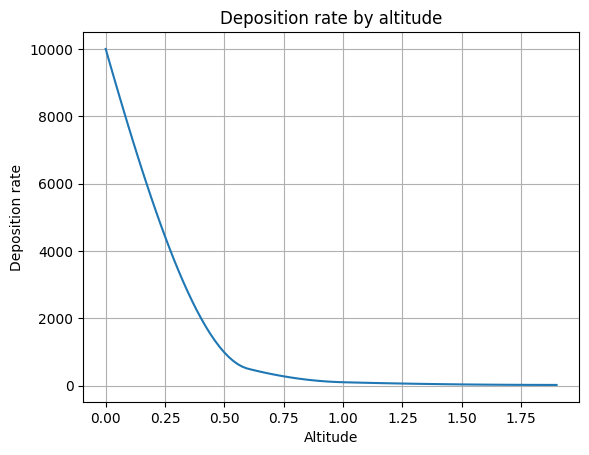

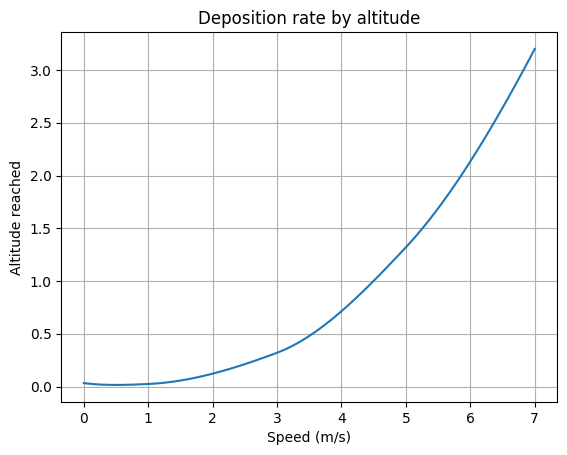

In [21]:
# LUNAR DUST TESTING WITH INPUT TIME


import time

dust_model = LunarDust()

panel_path = "/World/Lunar_Base/Rover/solo_solar_pannel"#panel_prim_path + "/Solar_Generator/Panel"
panel_color_path = panel_path + "/_materials/Material/Principled_BSDF"
panel = prim.GetPrimAtPath(panel_path)

dust_model.update(0, panel)
dust_model.update_color(panel_color_path)



i=0
coverage_points = []
time_points = []
while i < 400:
    
    dust_model.update(i*100000000, panel)
    dust_model.update_color(panel_color_path)

    time.sleep(0.8)
    coverage_points.append(dust_model.coverage * 100)
    time_points.append(i*100)
    
    i+=1
print(coverage_points)
plt.figure()
plt.plot(time_points, coverage_points)
plt.grid(True)
plt.xlabel("Seconds")
plt.ylabel("Covered surface (%)")
plt.title("Covered surface by time")
plt.show()

In [20]:
usd_path = f"omniverse://localhost/Users/ubuntu/Rover_e_panneau.usd"#solar_panel_final.usdc"
rover_prim_path = prim_path + "/Rover"
prims_utils.delete_prim(rover_prim_path)


rover = prims_utils.create_prim(prim_path=rover_prim_path, usd_path=usd_path, scale=[20,20,20], position = [20, -80, 20])


world.render()

2025-03-04 11:11:52 [1,040,606ms] [Warning] [omni.physx.tensors.plugin] prim '/World/Lunar_Base/Rover/base_footprint' was deleted while being used by a link in a tensor view class. The physics.tensors simulationView was invalidated.
2025-03-04 11:11:52 [1,040,655ms] [Warning] [omni.graph.core.plugin] Could not find node type interface for 'omni.isaac.ros2_bridge.ROS2Context'
2025-03-04 11:11:52 [1,040,655ms] [Warning] [omni.graph.core.plugin] Could not find node type interface for 'omni.isaac.ros2_bridge.ROS2SubscribeTwist'
2025-03-04 11:11:52 [1,040,660ms] [Warning] [omni.graph.core.plugin] Could not find node type interface for 'omni.isaac.ros2_bridge.ROS2PublishTransformTree'
2025-03-04 11:11:52 [1,040,660ms] [Warning] [omni.graph.core.plugin] Could not find node type interface for 'omni.isaac.ros2_bridge.ROS2PublishOdometry'
2025-03-04 11:11:52 [1,040,660ms] [Warning] [omni.graph.core.plugin] Could not find node type interface for 'omni.isaac.ros2_bridge.ROS2PublishRawTransformTree

2025-03-04 11:11:52 [1,040,671ms] [Error] [omni.physx.tensors.plugin] Pattern '/World/Lunar_Base/Rover' did not match any rigid bodies

2025-03-04 11:11:52 [1,040,671ms] [Error] [omni.physx.tensors.plugin] Provided pattern list did not match any articulations

2025-03-04 11:11:52 [1,040,709ms] [Error] [omni.graph.core.plugin] /World/Lunar_Base/Rover/Graphs/ROS_Odometry/ComputeOdometry: [/World/Lunar_Base/Rover/Graphs/ROS_Odometry] prim is not a valid rigid body or articulation root


In [74]:
world.render()
prims_utils.set_prim_attribute_value("/World/random_cube2", "primvars:displayColor", Vt.Vec3fArray([Gf.Vec3f(0.5, 1.0, 1.0)] * 280))
#
world.render()
prims_utils.set_prim_attribute_value("/World/random_cube2", "primvars:displayOpacity", Vt.FloatArray([0.5]))


In [85]:
color = prims_utils.get_prim_at_path("World/Looks/visual_material")
prims_utils.get_prim_attribute_names("/World/Looks/visual_material/shader")

prims_utils.set_prim_attribute_value("/World/Looks/visual_material/shader", 'inputs:diffuseColor', Gf.Vec3f(0.9, 0.1, 1.0))
world.render()

DUST COVERAGE LIMITED BY DUST SIZE
Max surface coverage for  4e-05  m dust:  0.10867968750000001


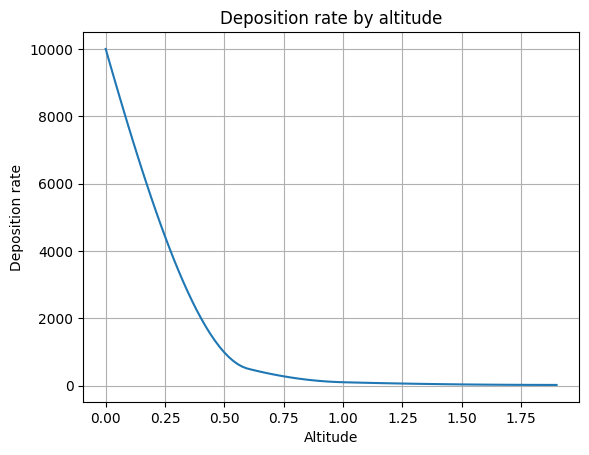

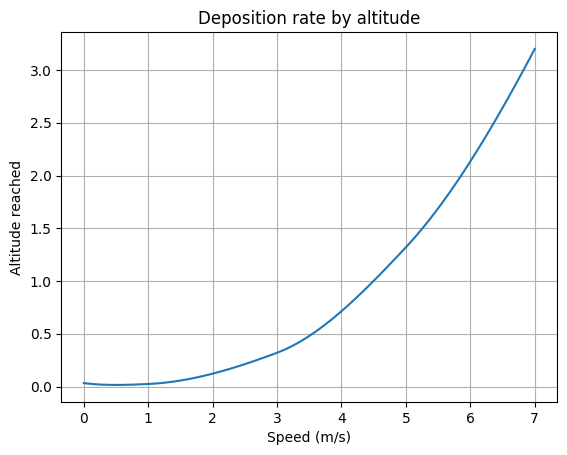

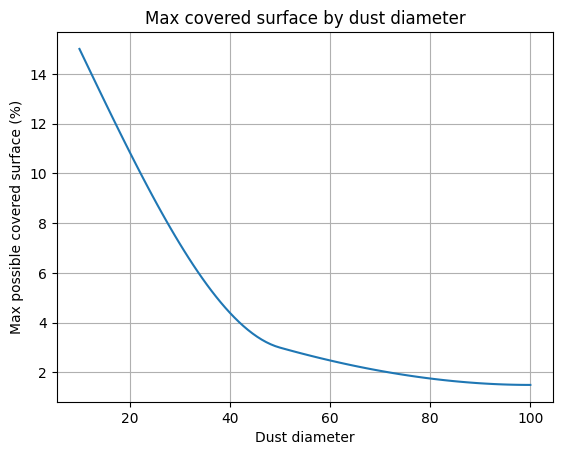

Time Passed:  1.5960596130904754e-07  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  1.3605755480264803e-06 %

Time Passed:  3.181549294968431e-07  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  2.71214066196007e-06 %

Time Passed:  4.767038976846387e-07  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  4.0637057758936605e-06 %

Time Passed:  6.352528658724343e-07  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  5.41527088982725e-06 %

Time Passed:  7.938018340602299e-07  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  6.76683600376084e-06 %

Time Passed:  9.523508022480255e-07  years
Altitude:  0.699999988079071  m
Taux 

KeyboardInterrupt: 

Time Passed:  4.123330166003937e-06  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  3.5149703396366216e-05 %

Time Passed:  4.281879134191733e-06  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  3.6501268510299805e-05 %

Time Passed:  4.440428102379529e-06  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  3.7852833624233394e-05 %

Time Passed:  4.5989770705673244e-06  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  3.920439873816698e-05 %

Time Passed:  4.75752603875512e-06  years
Altitude:  0.699999988079071  m
Taux de deposition:  340.9836416803948  micrograms/cm^2*y
Covered surface by dust:  4.055596385210057e-05 %

Time Passed:  4.916075006942916e-06  years
Altitude:  0.699999988079071  m
Ta

In [12]:
# LUNAR DUST TESTING WITH SIMULATION TIME

import omni.timeline

timeline = omni.timeline.get_timeline_interface()
timeline.play()

dust_model = LunarDust()
dust_model.reset_accumulation()

j=0
last_lunar_dust_call = timeline.get_current_time()
while j<1000000:
    current_time = timeline.get_current_time()
    #print(current_time)


    if current_time - last_lunar_dust_call > 5:
        dust_model.update(current_time, panel_structure)
        last_lunar_dust_call = current_time

    current_time = timeline.get_current_time()
    simulation_app.update()

    j+=1

In [ ]:
# PANEL CLASS TEST WITH DIFFERENT ANGLES

import omni.isaac.core.utils.rotations as rotations_utils

panel_prim_path = prim_path + "/Panel/Solar_Generator/Panel"

panel_test = Panel(panel_prim_path)
panel_test.display_state()

N = 100
panel_angles = np.zeros((N, 3)) 
panel_angles[:,0] = np.linspace(-50, 50, num=N)

sun_angles = np.zeros((N, 3))
sun_angles[:,0] = 3 * np.cos(np.linspace(0, 3.14, num=N))
sun_angles[:,1] = 3 * np.sin(np.linspace(0, 3.14, num=N))
sun_angles[:,2] = 50 + np.linspace(.05, 7.5, num=N)

battery_charge = []
power_produced = []
for p,s in zip(panel_angles, sun_angles):
    panel_test.set_panel_orientation_euler(p, degrees = True)
    adjust_light(stage, tuple(s))
    
    timeline.play()
    for _ in range(2):
        simulation_app.update()
    timeline.pause()

    panel_test.update(stage, 100*i) ### CHANGED
    
    #panel_test.update_power_produced(stage)
    #print(panel_test.power_produced)
    #panel_test.update_state(100)
    battery_charge.append(panel_test.current_storage)
    power_produced.append(panel_test.power_produced)
    
    panel_test.display_state()
    world.render()
    i+=1 ### CHANGED

DUST COVERAGE LIMITED BY DUST SIZE
Max surface coverage for  4e-05  m dust:  0.10867968750000001


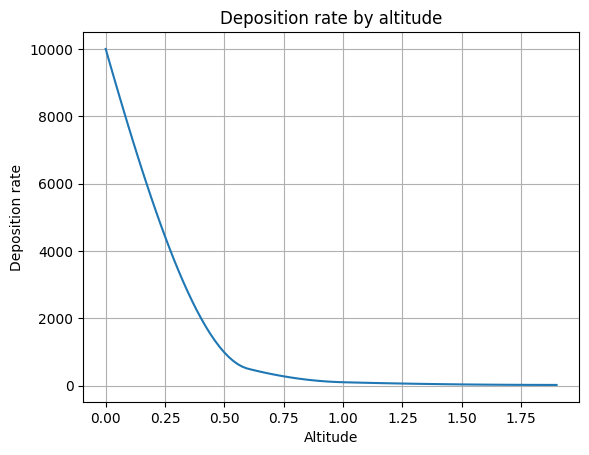

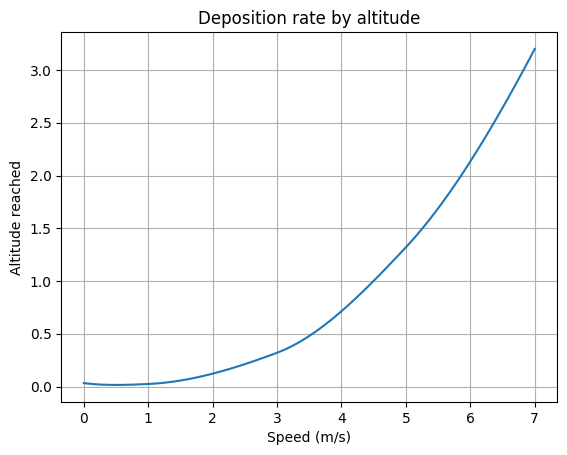

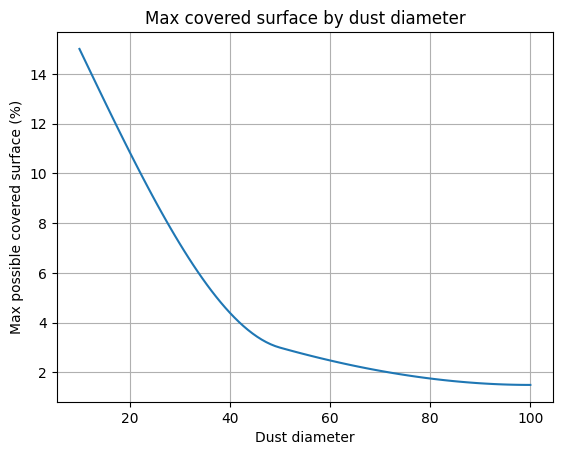

Time Passed:  0.0  years
Altitude:  8.699999988079071  m
Taux de deposition:  16.171335261239456  micrograms/cm^2*y
taux for the increase 0.00016171335261239457
UPDATE DONE BY AN INCREASE OF  0.0
Covered surface by dust:  0.0 %

COVERAGEEEEEEEEEEEE 0.0
Battery is empty
Battery is at 0.0%, actual production (W) : 100.45211853676344, actual consumption (W): 10 | current_storage (Wh) : 0.0 
Time Passed:  3.1709791983764586e-06  years
Altitude:  8.699999988079071  m
Taux de deposition:  16.171335261239456  micrograms/cm^2*y
taux for the increase 0.00016171335261239457
UPDATE DONE BY AN INCREASE OF  1.2819741930840511e-08
Covered surface by dust:  1.2819741930840511e-06 %

COVERAGEEEEEEEEEEEE 1.2819741930840511e-08
Battery is at 0.25%, actual production (W) : 100.45211724899322, actual consumption (W): 10 | current_storage (Wh) : 2.5125588124720335 
Time Passed:  6.341958396752917e-06  years
Altitude:  8.699999988079071  m
Taux de deposition:  16.171335261239456  micrograms/cm^2*y
taux for 

In [33]:
# TESTING WITH INPUT TIME AND PANEL CLASS


panel_prim_path = prim_path + "/Panel/Solar_Generator/Panel"
panel_test = Panel(panel_prim_path)

i=0
coverage_points = []
time_points = []
while i < 200:
    
    
    panel_test.update(stage, 100*i)
    panel_test.display_state()
    i+=1

DUST COVERAGE LIMITED BY DUST SIZE
Max surface coverage for  4e-05  m dust:  0.10867968750000001


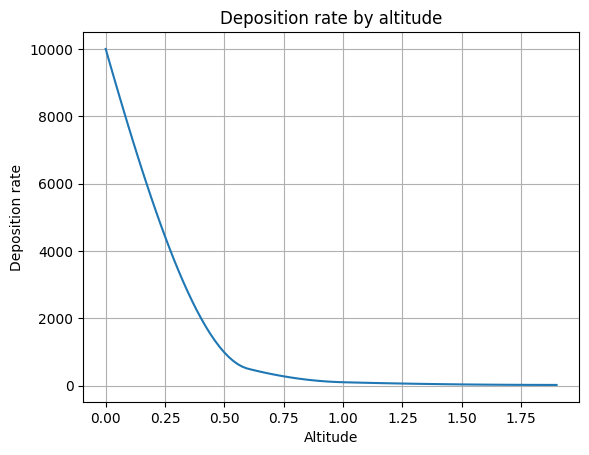

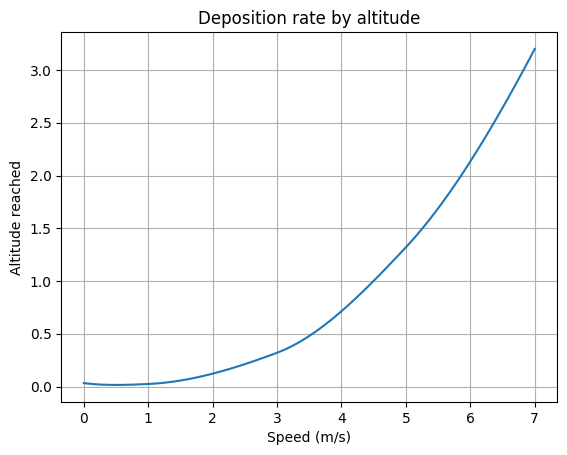

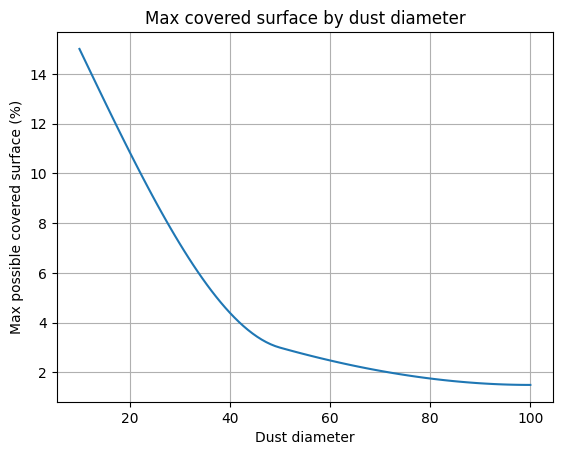

Current time:  3766.650196446106

100.00000521540642
Time Passed:  0.00011943969420491203  years
Altitude:  8.699999988079071  m
Taux de deposition:  16.171335261239456  micrograms/cm^2*y
taux for the increase 0.00016171335261239457
UPDATE DONE BY AN INCREASE OF  4.828748346218879e-07
Covered surface by dust:  4.8287483462188794e-05 %

COVERAGEEEEEEEEEEEE 4.828748346218879e-07
Battery is at 9.46%, actual production (W) : 100.45207003096331, actual consumption (W): 10 | current_storage (Wh) : 94.63925204196802 
----------------------------------------------------------------------------------------
Current time:  3866.6502016615123

100.00000521540642
Time Passed:  0.00012261067356866793  years
Altitude:  8.699999988079071  m
Taux de deposition:  16.171335261239456  micrograms/cm^2*y
taux for the increase 0.00016171335261239457
UPDATE DONE BY AN INCREASE OF  1.2819742599442155e-08
Covered surface by dust:  4.9569457722133016e-05 %

COVERAGEEEEEEEEEEEE 4.956945772213301e-07
Battery is at

In [ ]:
# TESTING WITH SIMULATION TIME AND PANEL CLASS

import omni.timeline

timeline = omni.timeline.get_timeline_interface()
timeline.play()

import omni.isaac.core.utils.rotations as rotations_utils

panel_prim_path = prim_path + "/Panel/Solar_Generator/Panel"
panel_test = Panel(panel_prim_path)

j=0
last_lunar_dust_call = timeline.get_current_time()
while j<100000:
    current_time = timeline.get_current_time()
    #print(previous_time)


    if current_time - last_lunar_dust_call > 100:
        print("Current time: ", current_time)
        print("")
        print(current_time - last_lunar_dust_call)
        panel_test.update(stage, current_time)
        panel_test.display_state()
        print("----------------------------------------------------------------------------------------")
        last_lunar_dust_call = current_time

    current_time = timeline.get_current_time()
    simulation_app.update()

    j+=1